**Aluna:**

Ada Maris Pereira Mário, Nº USP: 12725432

## Preparação dos Dados

In [ ]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv', header=(0))
test = pd.read_csv('test.csv', header=(0))

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)

print("\nConjunto de Treinamento:")
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)

Conjunto de Treinamento:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print('\nConjunto de teste')
test.head(10)


Conjunto de teste


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Extraindo algumas informações dos dados de treinamento:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vemos que alguns atributos contêm valores ausentes, como é o caso de "Age", por exemplo.

## Limpeza e normalização dos Dados

In [ ]:
# Removendo atributos irrelevantes
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
# Guardando o ID de cada passageiro para a submissão no Kaggle
PassengerId_test = test['PassengerId']

test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


Verificando os valores nulos e NaN em cada conjunto:

In [ ]:
print("Análise conjunto de treinamento:")
train.isnull().sum().sort_values(ascending=False).head(10)

Análise conjunto de treinamento:


Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
print("Análise conjunto de teste:")
test.isnull().sum().sort_values(ascending=False).head(10)

Análise conjunto de teste:


Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

Vamos substituir os NaN presentes nos atributos "Age" e "Fare" pela mediana de cada coluna. Já no atributo "Embarked", colocaremos a moda.

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

Conferindo novamente se ainda restam NaN:

In [ ]:
print("Análise conjunto de treinamento:")
train.isnull().sum().sort_values(ascending=False).head(10)

Análise conjunto de treinamento:


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
print("Análise conjunto de teste:")
test.isnull().sum().sort_values(ascending=False).head(10)

Análise conjunto de teste:


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Agora, devemos converter os atributos nominais para numéricos em cada um dos conjuntos.

In [ ]:
train_original = train
train = pd.get_dummies(train)
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [ ]:
test = pd.get_dummies(test)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


In [ ]:
# Convertendo os dados do conjunto de treinamento para o formato numpy:
data_train = train.to_numpy()
nrow,ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

# Conjunto de teste:
data_test = test.to_numpy()
X_test = data_test

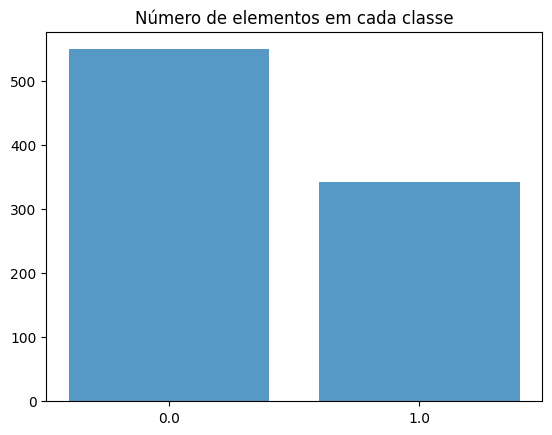

In [ ]:
# Verificando o balanceamento de cada classe:
classes = y_train
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])

numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Normalizando os dados:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

print('Dados transformados:')
print('Media: ', np.mean(X_test, axis = 0))
print('Desvio Padrao:', np.std(X_test, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  2.27277979e-16  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -8.37339924e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dados transformados:
Media:  [-0.05156969  0.01826719 -0.06863058  0.01334498  0.06790076  0.02349348
 -0.02349348  0.14180391  0.08409087 -0.1771445 ]
Desvio Padrao: [1.00625661 0.97511422 0.81269066 1.21679298 1.12317842 1.00695788
 1.00695788 1.09804783 1.11376674 1.07106262]


## Análise exploratória dos dados

Inicialmente, vamos analisar a correlação entre os atributos

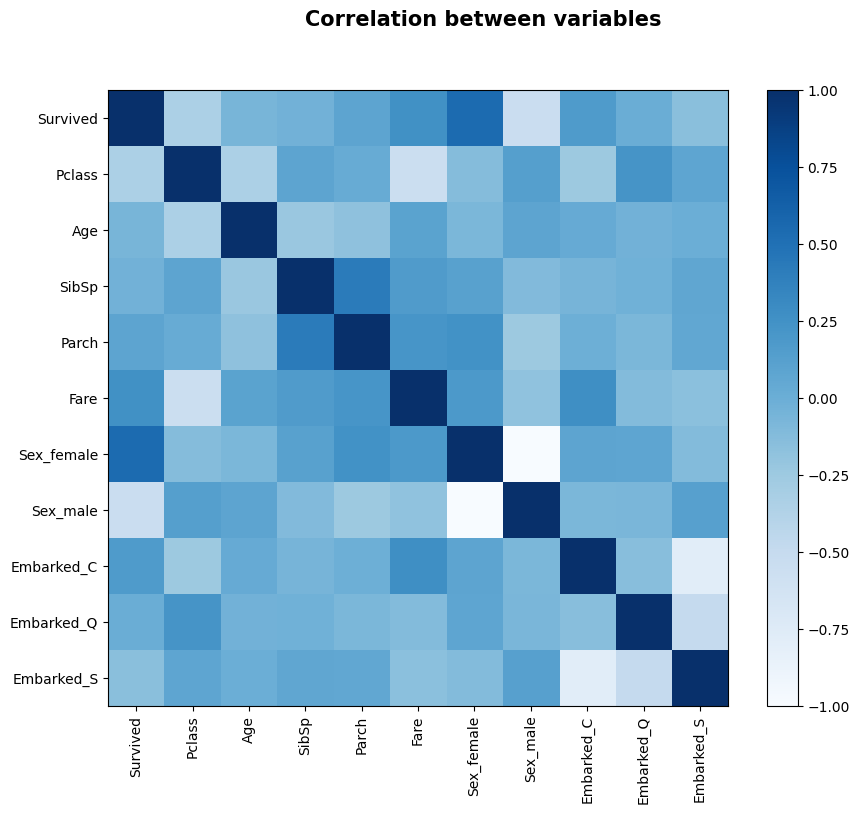

In [ ]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Apesar de os atributos não serem fortemente relacionados, vemos que a maioria dos sobreviventes são do sexo feminino.

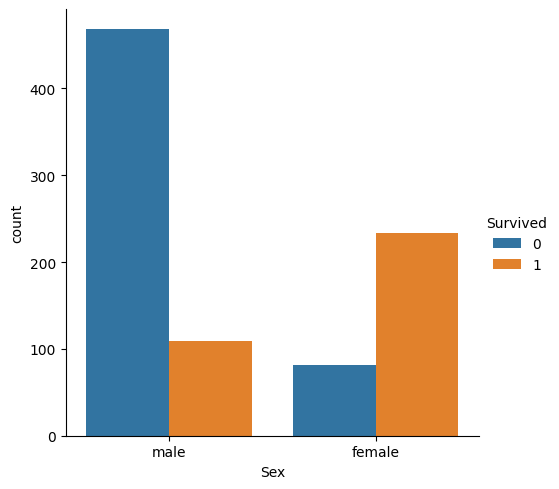

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_original)

Agora, analisando a relação entre a classe do passageiro e se ele sobreviveu ou não.

<Axes: xlabel='Survived', ylabel='Pclass'>

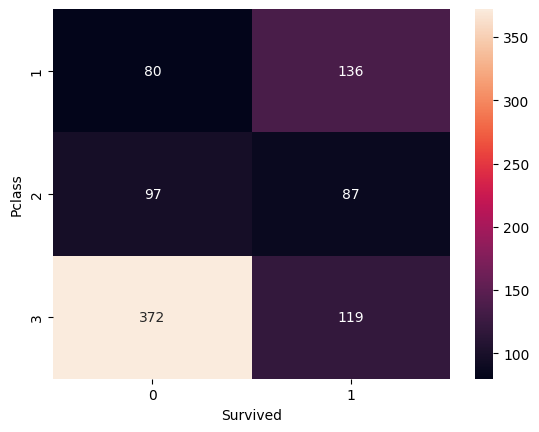

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

group = train_original.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Analisando a relação com a idade dos passageiros:

<Axes: xlabel='Sex', ylabel='Age'>

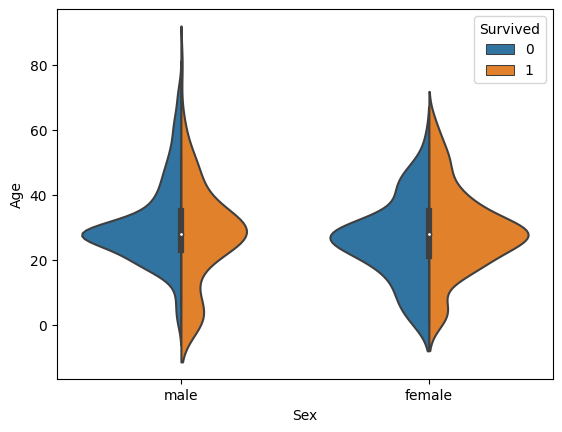

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_original, split = True)

Vemos, também, que de acordo com o preço do bilhete, quanto mais caro, maior a chance de sobrevivência.

<Axes: xlabel='Fare_Range', ylabel='Survived'>

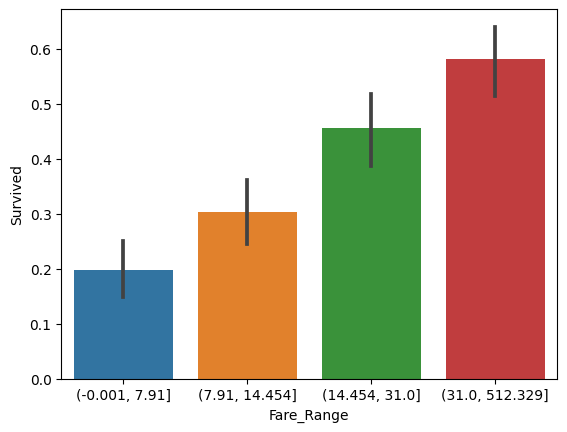

In [ ]:
# Divide Fare into 4 bins
train_original['Fare_Range'] = pd.qcut(train_original['Fare'], 4)

# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = train_original)

De acordo com o porto de embarque, notamos que a maioria dos sobreviventes são do porto de Southampton (S). Além disso, em Queenstown (Q) embaracaram a maioria dos passageiros da terceira classe.

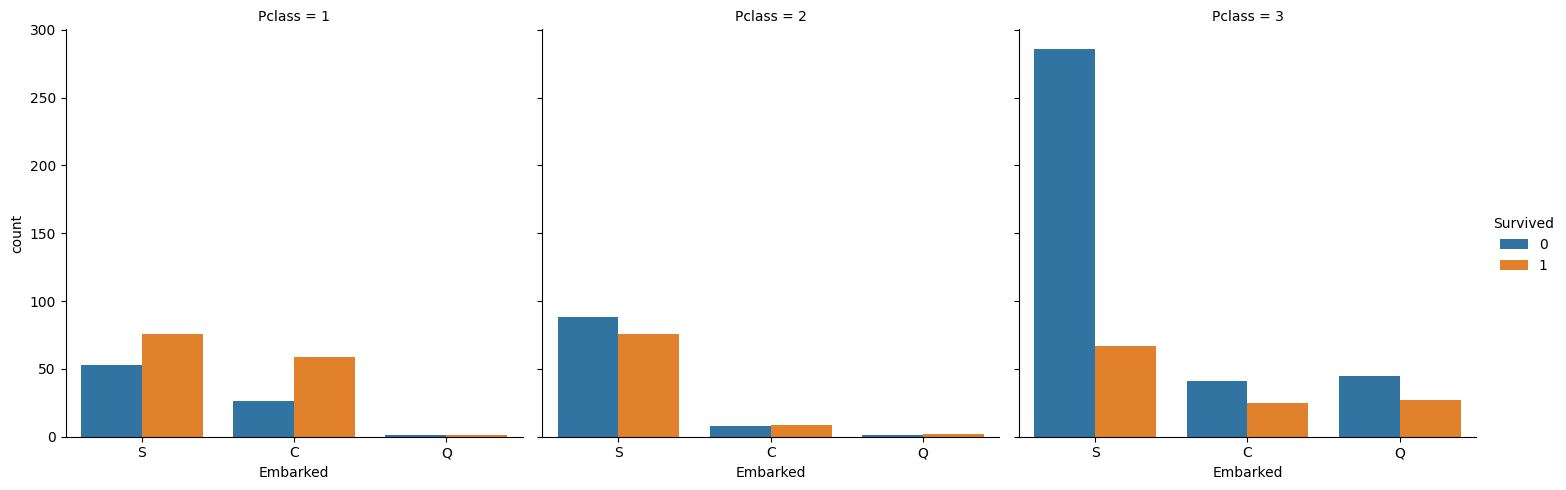

In [ ]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_original)

## Seleção e ajuste do modelo

Utilizando GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train GradientBoosting Classifer
model1 = clf.fit(X_train, y_train)

print("Acurácia no Conjunto de Treinamento:", model1.score(X_train, y_train))

Acurácia no Conjunto de Treinamento: 0.8574635241301908


In [ ]:
from sklearn import svm

model2 = svm.SVC(kernel = "rbf")
model2.fit(X_train,y_train)

print("Acurácia no Conjunto de Treinamento:", model2.score(X_train, y_train))

Acurácia no Conjunto de Treinamento: 0.8428731762065096


## Classificação

Após realizar a classificação final, salvamos os dados em um arquivo para enviar para o Kaggle.

In [ ]:
# GradientBoost:

y_pred = model1.predict(X_test)
y_pred = np.array(y_pred, dtype = int)

prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-GradientBoostMaxdep2.csv', index = False)

Acurácia Kaggle: 0.77272

In [ ]:
# SVM:

y_pred = model2.predict(X_test)
y_pred = np.array(y_pred, dtype = int)

prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-SVM.csv', index = False)

Acurácia Kaggle: 0.7799